# Visual Waldorf Statler 

In [1]:
import pandas as pd

# LOAD full visual features
ep1 = pd.read_csv('../data/ep1_visual_full.csv')
ep2 = pd.read_csv('../data/ep2_visual_full.csv')
ep3 = pd.read_csv('../data/ep3_visual_full.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (787) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
from sklearn.model_selection import train_test_split

# MERGE
DATA = pd.concat([ep1, ep2, ep3])
X = DATA.filter(regex=("_hist"))
Y = DATA.ws_video

# SPLIT
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

For a first implementation, we tried re-using an existing classfier from kermit video detection

In [3]:
%%time
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve

# use tpot classifier
pipe = ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.25, min_samples_leaf=8, min_samples_split=11, n_estimators=100)
if hasattr(pipe, 'random_state'):
    setattr(pipe, 'random_state', 42)

pipe.fit(x_train, y_train)

CPU times: user 49.9 s, sys: 240 ms, total: 50.1 s
Wall time: 50.1 s


ExtraTreesClassifier(bootstrap=True, max_features=0.25, min_samples_leaf=8,
                     min_samples_split=11, random_state=42)

Accuracy:   0.9994
Precision:  0.977
Recall:     0.9648
F1:         0.9708


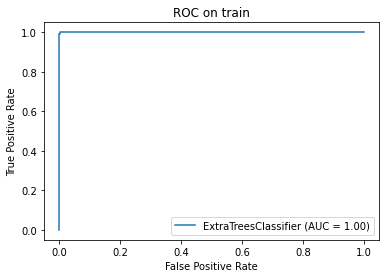

In [7]:
# EVAL TRAIN
tpreds = pipe.predict(x_train)
print("Accuracy:  ", round(accuracy_score(y_train,tpreds),4) )
print("Precision: ", round(precision_score(y_train,tpreds),4) )
print("Recall:    ", round(recall_score(y_train,tpreds),4) )
print("F1:        ", round(f1_score(y_train,tpreds),4) )

plot_roc_curve(pipe, x_train, y_train)
plt.title("ROC on train")
plt.show()

Accuracy:   0.9988
Precision:  0.9486
Recall:     0.9227
F1:         0.9355


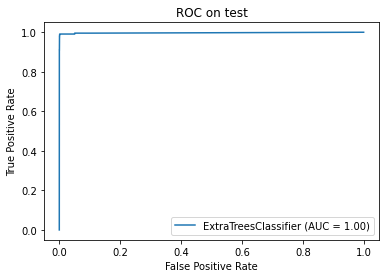

In [8]:
# EVAL TEST
preds = pipe.predict(x_test)
print("Accuracy:  ", round(accuracy_score(y_test,preds),4) )
print("Precision: ", round(precision_score(y_test,preds),4) )
print("Recall:    ", round(recall_score(y_test,preds),4) )
print("F1:        ", round(f1_score(y_test,preds),4) )

plot_roc_curve(pipe, x_test, y_test)
plt.title("ROC on test")
plt.show()

This looks very good, which lead us to the conclusion that no further implementation was needed. 